#### Background Info:

The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled and diverted flights appears in DOT's monthly Air Travel Consumer Report, published about 30 days after the month's end, as well as in summary tables posted on this website. BTS began collecting details on the causes of flight delays in June 2003. Summary statistics and raw data are made available to the public at the time the Air Travel Consumer Report is released.

#### Dataset Descriptions:

This dataset is free in [Kaggle](https://www.kaggle.com/) and is once used for [Kaggle Competition - Airlines Delay](https://www.kaggle.com/giovamata/airlinedelaycauses). The dataset covered a long period of time which continued from 1987 to 2008. We selected the latest dataset and used only three columns of the raw dataset for Shortest Path Problem.



| Variables | Descriptions                                                              |
|-----------|---------------------------------------------------------------------------|
| Origin    | origin: Departure Airport                                                 |
| Dest      | destination: Landing Airport                                              |
| Distance  | distance: distance in miles between Departure Airport and Landing Airport |

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

First, we should load all the raw data in Ipython Notebook. Then, in case of dirty data's pollution, we should drop the rows which contains 'NA', 'NAN' and so forth. Then show the first five rows to preview the data.

In [3]:
# Load raw data file to IPython Notebook
# This step will be a little slow because of the huge amount of data
df = pd.read_csv("/Users/macbookpro/Desktop/IE_532_GNN_project/4_GNN_Project_Files/2008.csv")
df.dropna(axis=0, how='any')
# df.head()
print ("......")
print ("CSV file loading complete!!")

......
CSV file loading complete!!


In [4]:
# The shape of raw data
# After cutting the raw data, it contains 5,000,000 entries
df.shape

(7009728, 29)

In [5]:
# Select three columns ('Origin', 'Dest', 'Distance') which we need for this project, 
# and have a glimpse of what data looks like

# Select the number of rows we used for train and test totally.
# Here we select n = 1,500,000
num_samples = [1000000, 1500000, 2000000]

# Split the dataset
samples = df[['Origin', 'Dest', 'Distance']][:num_samples[1]]

In [6]:
# Parameters Initialization

# Splitting parameters
num_train_set = 1200
num_test_set = 300

# training set with index
Train_set = []
for i in range(num_train_set):
    Train_set.append('Train_set' + str(i))   

# test set with index
Test_set = []
for i in range(num_test_set):
    Test_set.append('Test_set' + str(i))

# training graph with index
Train_graph = []
for i in range(num_train_set):
    Train_graph.append('Train_graph' + str(i))
    
# test graph with index
Test_graph = []
for i in range(num_test_set):
    Test_graph.append('Test_graph' + str(i))

In [7]:
# Sort dataframe by Origin incase of there is no edges in specific splitting
samples.sort_values(by='Origin', axis=0, ascending=True)

# Train-test splitting ratio
splitting_ratio = 0.2

# Use Sklearn package to split the raw data into two pieces.
Airline_train, Airline_test = train_test_split(samples, test_size=splitting_ratio)
print (Airline_train.shape)
print (Airline_test.shape)
print (samples.shape)

(1200000, 3)
(300000, 3)
(1500000, 3)


Now, we have our training set and test set.

As it is so large and it will be hard to train. So we intend to split the training set to 1,200 different dataframes.

So as test set!

Also, we initialize the train_graph and test_graph for graph initialization

In [8]:
# Create a function which we can apply to split the dataframe into two fractions.
def DataframeSplit(df, num):
    df1 = df[:num]
    df = df[num:]
    return df1, df

In [9]:
# Initialize number of rows in train set
train_split_num = int(num_samples[1] * (1 - splitting_ratio) / num_train_set)    # In this case, value = 1000
test_split_num = int(num_samples[1] * splitting_ratio / num_test_set)            # In this case, value = 1000

In [10]:
# Split the training set
for i in range(len(Train_set)):  # len(Train_set) = 1200
    Train_set[i], Airline_train = DataframeSplit(Airline_train, num=train_split_num)

print ("Train_set assignment has completed!!")
Train_set[123].head()

Train_set assignment has completed!!


,Origin,Dest,Distance
1179386,LAS,RDU,2027
594078,MCO,ATL,403
1169250,JFK,LAX,2475
1275532,GEG,SAN,1027
1334915,CVG,LGA,585


In [11]:
# Split the test set
for i in range(len(Test_set)):   # len(Test_set) = 300
    Test_set[i], Airline_test = DataframeSplit(Airline_test, num=test_split_num)

print ("Test_set assignment has completed!!")  
Test_set[123].head()

Test_set assignment has completed!!


,Origin,Dest,Distance
204428,MSO,SLC,436
1411392,ORD,JAX,865
1408197,DEN,MSP,680
886768,OAK,GEG,723
368947,BOS,BWI,370


In [12]:
# Creating Digraph, the weight of edges will be the distance between two nodes
for i in range(len(Train_set)):
    Train_graph[i] = nx.from_pandas_dataframe(Train_set[i], 'Origin', 'Dest', 
                                              edge_attr='Distance', 
                                              create_using=nx.DiGraph())
print (".....")
print ("Train_graph assignments are complete! ")

for i in range(len(Test_set)):
    Test_graph[i] = nx.from_pandas_dataframe(Test_set[i], 'Origin', 'Dest', 
                                             edge_attr='Distance', 
                                             create_using=nx.DiGraph())    
print (".....")
print ("Test_graph assignments are complete! ")    

.....
Train_graph assignments are complete! 
.....
Test_graph assignments are complete! 


/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


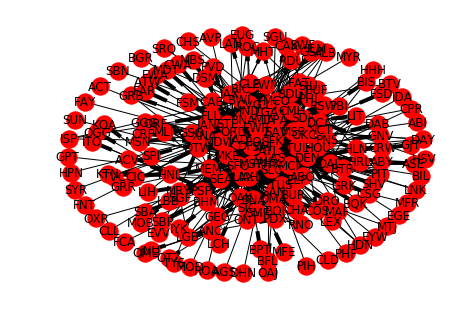

In [13]:
nx.draw(Test_graph[12], with_labels = True)
plt.show()

In [14]:
# First, apply Diskstra's Algorithm to evaluate our train dataset
print (nx.shortest_path(Train_graph[123],source='CLT',target='OMA'))
print (nx.shortest_path_length(Train_graph[123],source='CLT',target='OMA', weight='Distance'))
print (Train_graph[123].number_of_nodes())

['CLT', 'ORD', 'OMA']
917
191


In [15]:
# Second, apply Diskstra's Algorithm to evaluate our test dataset
print (nx.shortest_path(Test_graph[123],source='CLT',target='OMA'))
print (nx.shortest_path_length(Test_graph[123],source='CLT',target='OMA', weight='Distance'))
print (Test_graph[123].number_of_nodes())

['CLT', 'IAH', 'OMA']
1694
188
